# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import therpy as tp
import scipy
import matplotlib.pyplot as plt

cst = tp.cst(sigmaf=0.5, trapw = 2*np.pi*23.35)
%matplotlib inline

Updating the local database...
Done


# Data loading and prepping for therpy

In [24]:
# # Read the data and pickle
# a_data_path = 'D:\\User\\Documents\\scatteringlengths2013jochimjulienne.csv'
# if os.path.exists(a_data_path):
#     a_data = pd.read_csv(a_data_path)
#     pickle.dump(a_data, open( "D:\\User\\Documents\\scatteringLi6.p" , "wb"))

In [29]:
a_data = pickle.load(open( "D:\\User\\Documents\\scatteringLi6 - Copy.p" , "rb"))

In [30]:
a_data.head()

,B,a12,a13,a23
0,1.0,-0.7,-820.4,24.6
1,2.0,-0.7,-693.3,24.0
2,3.0,-0.8,-623.9,23.4
3,4.0,-0.8,-578.2,22.8
4,5.0,-0.9,-545.3,22.2


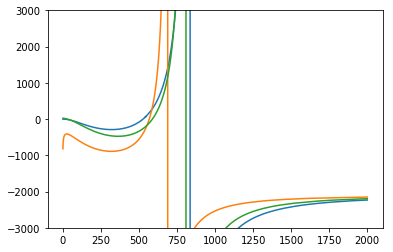

In [4]:
plt.plot(a_data['B'], a_data['a12'])
plt.plot(a_data['B'], a_data['a13'])
plt.plot(a_data['B'], a_data['a23'])
plt.ylim([-3000,3000])
plt.show()

In [6]:
f = scipy.interpolate.interp1d(a_data['B'], a_data['a13'])

In [15]:
x = np.linspace(1,1999,4999)
y = f(x)

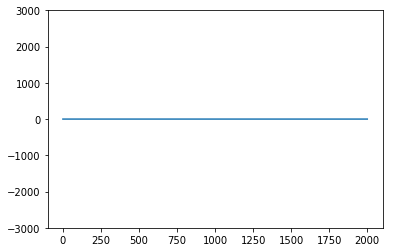

In [21]:
# plt.plot(a_data['B'], a_data['a13'])
plt.plot(a_data['B'],a_data['a13']-f(a_data['B']))
# plt.plot(a_data['B'], a_data['a13'])
# plt.plot(a_data['B'], a_data['a23'])
plt.ylim([-3000,3000])
plt.show()

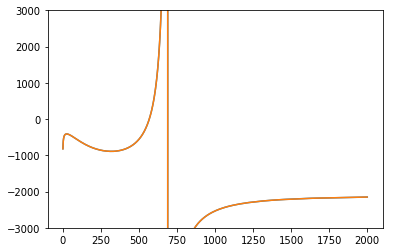

In [24]:
plt.plot(a_data['B'], a_data['a13'])
plt.plot(x,y)
plt.ylim([-3000,3000])
plt.show()

# Testing therpy

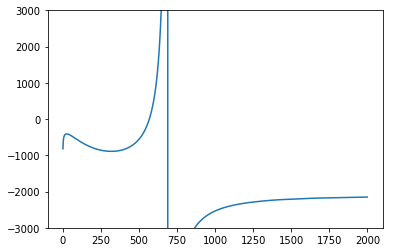

In [3]:
Btest = np.linspace(1,1999,4999)
plt.plot(Btest, cst.Li6_scattering_length(B=Btest, states='13'))
plt.ylim([-3000,3000])
plt.show()

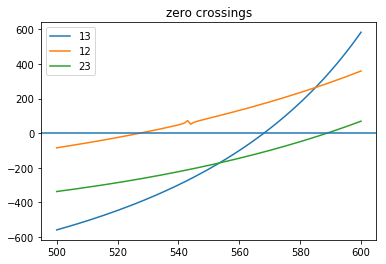

In [19]:
Btest = np.linspace(500,600,4999)
plt.plot(Btest, cst.Li6_scattering_length(B=Btest, states='13'),label='13')
plt.plot(Btest, cst.Li6_scattering_length(B=Btest, states='12'),label='12')
plt.plot(Btest, cst.Li6_scattering_length(B=Btest, states='23'),label='23')
plt.axhline([0])
plt.legend()
# plt.ylim([-3000,3000])
plt.title('zero crossings')
plt.show()

In [3]:
cst.n2interaction_strength(1e17, states='13', B=670)

1.1962758060665801

In [4]:
cst.interaction_strength2EFHz(1, B=670)

3935.5250518548833

## Test interpolation near unitarity

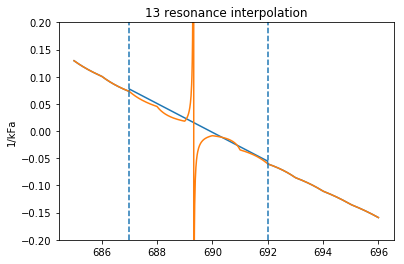

In [3]:
Btest = np.linspace(685,696,1000)
plt.plot(Btest, cst.BEF2interaction_strength(B=Btest))
plt.plot(Btest, cst.BEF2interaction_strength(B=Btest, interp=False))
plt.ylim([-.2,.2])
plt.axvline(692,ls='--')
plt.axvline(687,ls='--')
# plt.xlim([689,690])
plt.ylabel('1/kFa')
plt.title('13 resonance interpolation')
plt.show()

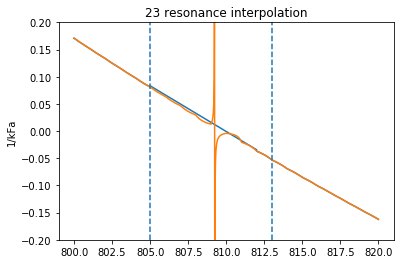

In [4]:
Btest = np.linspace(800,820,1000)
# Btest = np.linspace(685,696,1000)
plt.plot(Btest, cst.BEF2interaction_strength(B=Btest, states='23'))
plt.plot(Btest, cst.BEF2interaction_strength(B=Btest,states='23', interp=False))
plt.ylim([-.2,.2])
plt.axvline(805,ls='--')
plt.axvline(813,ls='--')
plt.ylabel('1/kFa')
plt.title('23 resonance interpolation')
plt.show()

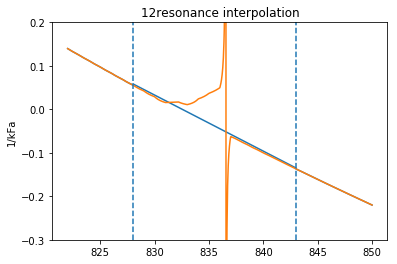

In [6]:
Btest = np.linspace(822,850,1000)
plt.plot(Btest, cst.BEF2interaction_strength(B=Btest, states='12'))
plt.plot(Btest, cst.BEF2interaction_strength(B=Btest, states='12', interp=False))
plt.ylim([-0.3,0.2])
plt.axvline(828,ls='--')
plt.axvline(843,ls='--')
plt.ylabel('1/kFa')
plt.title('12resonance interpolation')
plt.show()

## test other functions

In [72]:
# def funSolve(B): return B - cst.BEF2interaction_strength(B=B)
# scipy.optimize.newton(funSolve, 800)

In [ ]:
# int_test = np.linspace(-1,1, 100)
# plt.plot(int_test, cst.interaction_strengthEF2B(interaction=int_test, EFHz=1e4, states='13'))

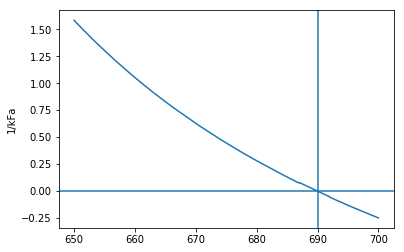

In [25]:
Btest = np.linspace(650,700,1000)
plt.plot(Btest, cst.BEF2interaction_strength(B=Btest, states='13', EFHz=1e4))
plt.axhline([0])
plt.axvline([690])
plt.ylabel('1/kFa')
plt.show()